<a href="https://colab.research.google.com/github/navneetkrc/PaddleOCR/blob/master/Clean_PaddleOCR_Aug18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PaddleOCR to identify the OCR text

PaddleOCR is a super-lightweight OCR model library open sourced by Baidu. It provides dozens of text detection and recognition models. It aims to create a rich, leading and practical text detection and recognition model/tool ​​library to help users train more Good model and application landing.

### 1.1 Prepare the operating environment
First, install the dependencies of PaddleOCR.

In [ ]:
!wget https://raw.githubusercontent.com/PaddlePaddle/PaddleOCR/develop/requirments.txt
# Install dependent libraries
!pip install -r /content/requirments.txt -i https://mirror.baidu.com/pypi/simple

### 1.2. Prepare inference model and test image

The inference model of the Chinese lightweight OCR model is placed in the ~/inference directory. You can call the following command to get the recognition result on the test image.
You can also download the latest inference model through the following instructions.

In [ ]:
##Download the dependencies for Google Colab
!git clone https://github.com/PaddlePaddle/PaddleOCR
!python -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

In [3]:
%cd /content/PaddleOCR
!pwd

/content/PaddleOCR
/content/PaddleOCR


In [ ]:
# Download the inference model and unzip
!wget https://paddleocr.bj.bcebos.com/inference.tar 
!tar xf inference.tar

In [5]:
#Download model with spaces
#!wget https://paddleocr.bj.bcebos.com/ch_models/ch_rec_r34_vd_crnn_enhance.tar
#! tar xf ch_rec_r34_vd_crnn_enhance.tar

#! wget https://paddleocr.bj.bcebos.com/ch_models/ch_rec_r34_vd_crnn_enhance_infer.tar
#! tar xf ch_rec_r34_vd_crnn_enhance_infer.tar

#Text Recognition Model
#!wget https://paddleocr.bj.bcebos.com/SRN/rec_r50fpn_vd_none_srn.tar #text recognition

In [ ]:
!wget https://jeroen.github.io/images/testocr.png

Some test images are prepared under the ~/content/pan folder, and you can upload your own images to test our OCR model.

Use code to visualize the test image, the code is as follows,

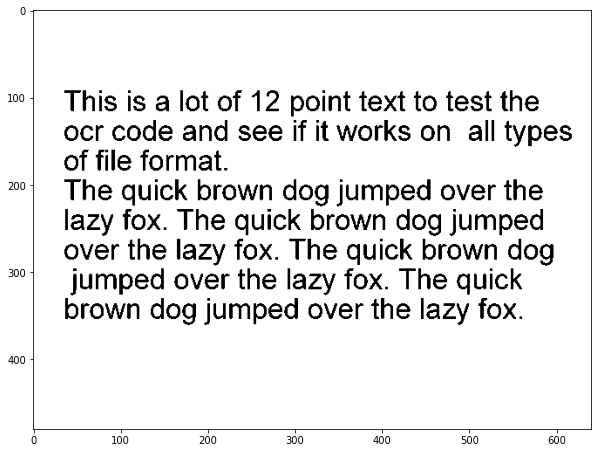

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

## Display the original image, read the test image named 11.jpg
img_path= "./testocr.png"
img = Image.open(img_path)
plt.figure("test_img", figsize=(10,10))
plt.imshow(img)
plt.show()

In [14]:
# Quick run for results
!export PYTHONPATH=. && python ./tools/infer/predict_system.py --use_gpu=False --image_dir="./testocr.png" \
    --det_model_dir="./inference/det/"  --rec_model_dir="./inference/rec/"

dt_boxes num : 9, elapse : 0.5683906078338623
rec_res num  : 9, elapse : 0.8828308582305908
Predict time of ./testocr.png: 1.489s
Thisisalotof12pointtexttotestthe, 0.978
ocrcodeandseeifitworksonalltypes, 0.977
offileformat, 0.988
Thequickbrowndogjumped, 0.960
overthe, 0.979
lazyfox.Thequickbrowndogjumped, 0.973
overthelazyfox.Thequickbrowndog, 0.979
jumpedoverthelazyfox.Thequick, 0.980
browndogjumpedoverthelazyfox., 0.972
The visualized image saved in ./inference_results/testocr.png


There are two columns of data in the output result. The first column represents the text recognized by PaddleOCR, and the second column represents the confidence of recognizing the current text. The data range of the confidence is [0-1], and the closer the confidence is to 1, the greater the "confidence" of the text recognition pair.

The following output results:
```
dt_boxes num : 9, elapse : 0.47234249114990234
rec_res num  : 9, elapse : 0.6773991584777832
Predict time of ./testocr.png: 1.184s
Thisisalotof12pointtexttotestthe, 0.978
ocrcodeandseeifitworksonalltypes, 0.977
offileformat, 0.988
Thequickbrowndogjumped, 0.960
overthe, 0.979
lazyfox.Thequickbrowndogjumped, 0.973
overthelazyfox.Thequickbrowndog, 0.979
jumpedoverthelazyfox.Thequick, 0.980
browndogjumpedoverthelazyfox., 0.972
The visualized image saved in ./inference_results/testocr.png
```
The confidence level for identifying the text as "Thequickbrowndogjumped, 0.960" is 0.960, and the confidence level for identifying "jumpedoverthelazyfox.Thequick, 0.980" is 0.980.

At the same time, the recognition result will be visualized in the image and saved in the ./inference_results folder. You can select the file to be opened through the directory structure on the left.
You can also use the following code to display the visualized image to observe the effect of OCR text recognition.

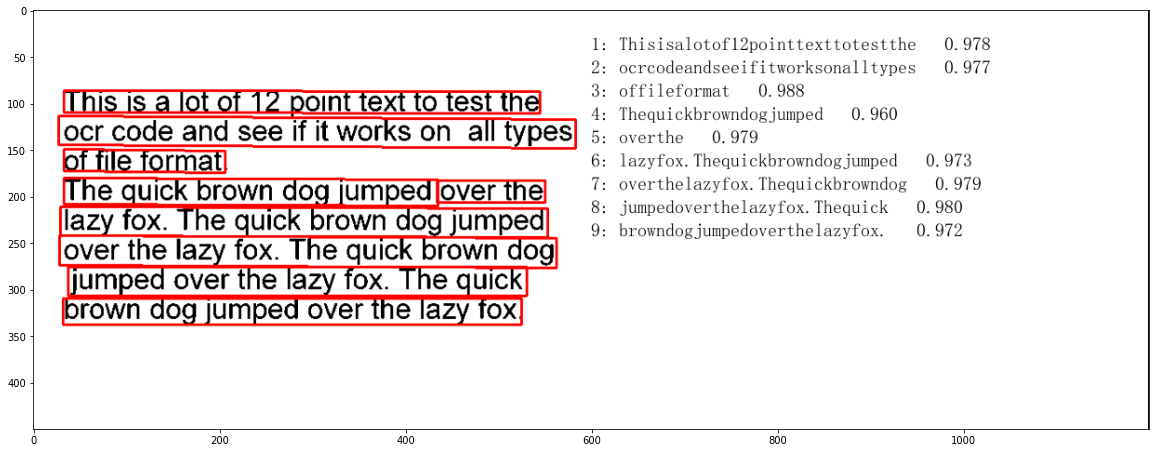

In [15]:
## Display the results of lightweight model recognition
## Visualize the text recognition effect of 12.jpg
img_path= "./inference_results/testocr.png"
img = Image.open(img_path)
plt.figure("results_img", figsize=(20,20))
plt.imshow(img)
plt.show()